## Find ocean mask for multidop grids

In [37]:
import pyart
import numpy as np
from copy import deepcopy
from scipy.interpolate import griddata as gd
from mpl_toolkits.basemap import Basemap, cm, maskoceans
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/rjackson/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cm', 'grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


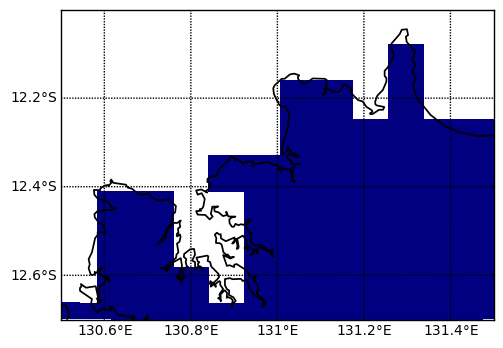

In [40]:
grid = pyart.io.read_grid('/home/rjackson/multidop_grids/cf_compliant_grid200601192140.nc')
lats = grid.point_latitude['data']
lons = grid.point_longitude['data']
zi = np.ones(lats.shape)
#mask points on ocean
data = maskoceans(lons, lats, zi)

CPOLGridDisplay = pyart.graph.GridMapDisplay(grid)
CPOLGridDisplay.plot_basemap(min_lat=-12.7, max_lat=-12.0,
                             min_lon=130.5, max_lon=131.5,
                             auto_range=False,
                             lat_lines=[-12.8, -12.6, -12.4, -12.2, -12.0],
                             lon_lines=[130.4, 130.6, 130.8, 131.0, 131.2, 131.4, 131.6],
                             resolution='h')
CS = CPOLGridDisplay.basemap.pcolormesh(lons[0], lats[0],
                                        data[0], latlon='True',
                                        linewidths=4)
ref_field = deepcopy(grid.fields['reflectivity'])
ref_field['long_name'] = 'Ocean mask'
ref_field['data'] = data
grid.add_field('ocean_mask', ref_field)
grid.write('/home/rjackson/multidop_grids/ocean_mask.nc')